# Explore here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

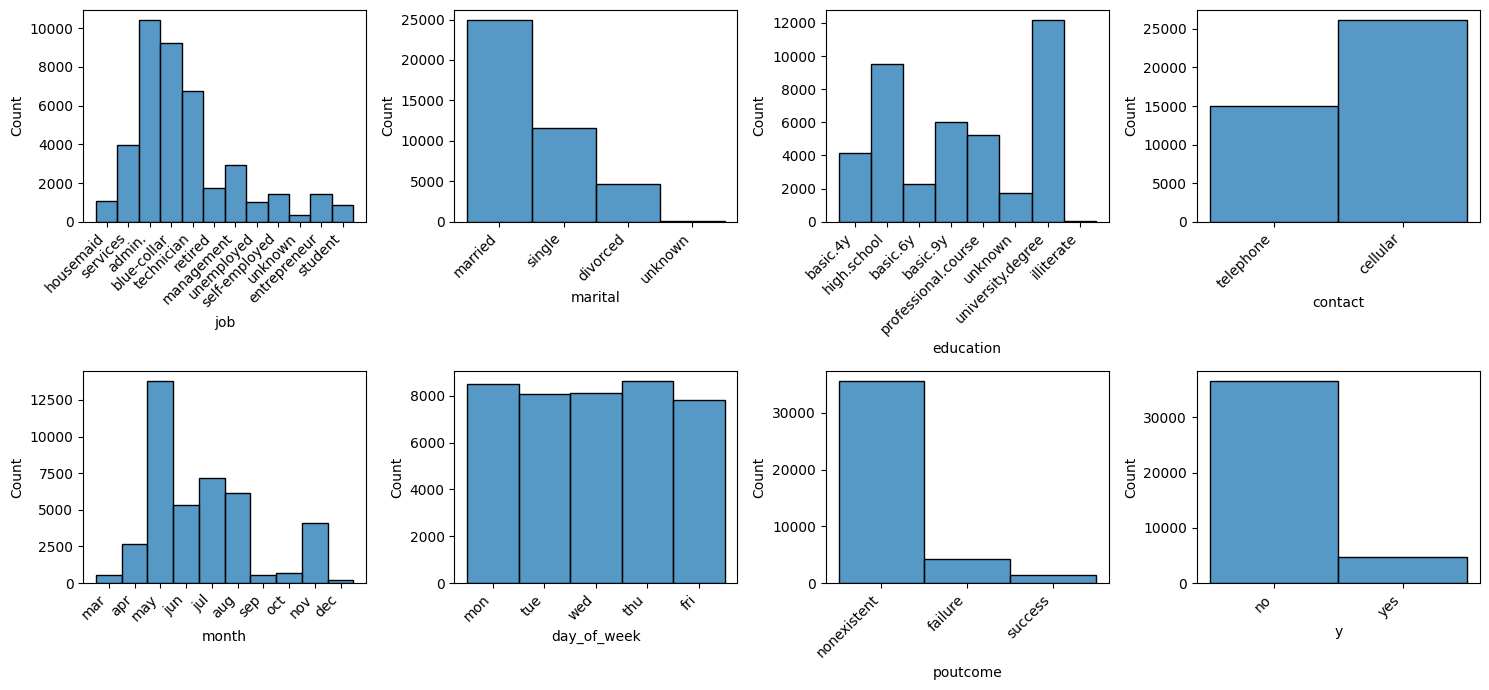

10
5
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
Categories (10, object): ['mar' < 'apr' < 'may' < 'jun' ... 'sep' < 'oct' < 'nov' < 'dec']
['mon' 'tue' 'wed' 'thu' 'fri']


In [ ]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add data to variable 'total data'
total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')

# Insert raw data inside raw folder inside root.
total_data.to_csv('/workspaces/ginotomasd-ml-project-logisticalregression/data/raw/total_data.csv')

# Check for columns and rows
total_data.shape

# Check values inside
total_data.info()

# We can see that only 1 column contains all the rows, and we fixed that by adding delimiters to our 'total_data' variable.
    # Now each variable is stored in an individual column, and we are able to check for nulls
        # We do not find any nulls, all columns contain the same number of rows.
            # We discard the possibility of duplicates

duplicates = total_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

total_data[duplicates]

# After checking duplicates, we discover they are not duplicates, as they contain different IDs but arent shown because, of the way the data is structured, there is no ID column.

# Next step we drop all the data that isn't useful: 'default', 'loan', 'housing', 'duration'

filtered_data = total_data.drop(['default', 'loan', 'housing', 'duration' ], axis=1, inplace=True)

# Analysis of categorical - numerical data

# Categorical data: 'job', 'marital', 'education', 'contact','month', 'day_of_week', 'poutcome', 'y'

fig, axis = plt.subplots(2, 4, figsize=(15,7))

custom_month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
total_data['month'] = pd.Categorical(total_data['month'], categories=custom_month_order, ordered=True)

sns.histplot(ax = axis[0,0], data = total_data, x = "job")
sns.histplot(ax = axis[0,1], data = total_data, x = "marital")
sns.histplot(ax = axis[0,2], data = total_data, x = "education")
sns.histplot(ax = axis[0,3], data = total_data, x = "contact")
sns.histplot(ax = axis[1,0], data = total_data, x = "month")
sns.histplot(ax = axis[1,1], data = total_data, x = "day_of_week")
sns.histplot(ax = axis[1,2], data = total_data, x = "poutcome")
sns.histplot(ax = axis[1,3], data = total_data, x = "y")

for ax in axis.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# As we visualize the data, we can make some observations:
    # 'job': The most popular jobs are 'Blue Collar', 'Administrative' and 'Technicians'
    # 'marital': As of marital status, there are more single than divorced potential clients, and married clients are the majority.
    # 'education': The majority of potential clients have a university degree, and the second most popular category is high school education, comprising almost 50% of the data.
    # 'contact': There was almost 66% more contact by cellular phone than telephone 
    # 'month': We can see that May has the most registered calls, which the next month declined and remained halved until August, when they completely dropped. In November, before Christmas peaked again, but dropped soon after the next month.
    # 'day of week': Mondays and Thursdays have the most amount of calls, while Friday had the least amount, although not by much.
    # 'poutcome': We can see that most people weren't reached by any previous campaigns, but for those who did, the overwhelming majority was a failure. 



